# __CS 6220 Assignment 1__

In [1]:
import pandas as pd

In [2]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat', sep='::', header=None, names=mnames, engine='python')

In [3]:
data = pd.merge(pd.merge(ratings, users), movies)

__Problem 1__

[10 pts] An aggregate of the movie ratings for each particular genre, e.g., Action, Adventure, Drama, Science Fiction, ...

In [4]:
aggregate_ratings = data.pivot_table('rating', index='genres', aggfunc='mean')
aggregate_ratings

,rating
genres,
Action,3.354886
Action|Adventure,3.676814
Action|Adventure|Animation,4.147826
Action|Adventure|Animation|Children's|Fantasy,2.703704
Action|Adventure|Animation|Horror|Sci-Fi,3.546926
...,...
Sci-Fi|Thriller|War,3.439286
Sci-Fi|War,4.449890
Thriller,3.555879


__Problem 2__

[10 pts] The top 5 highest ranked genre by women.

In [5]:
ratings_by_gender = data.pivot_table('rating', index='genres', columns='gender', aggfunc='mean')
top_female_ratings = ratings_by_gender.sort_values(by='F', ascending=False)
top_female_ratings['F'][:5]

genres
Animation|Comedy|Thriller             4.550802
Animation                             4.533333
Film-Noir|Romance|Thriller            4.448718
Sci-Fi|War                            4.376623
Adventure|Children's|Drama|Musical    4.355030
Name: F, dtype: float64

__Problem 3__

[10 pts] The top 5 highest ranked genre by men.

In [6]:
ratings_by_gender = data.pivot_table('rating', index='genres', columns='gender', aggfunc='mean')
top_male_ratings = ratings_by_gender.sort_values(by='M', ascending=False)
top_male_ratings['M'][:5]

genres
Sci-Fi|War                   4.464789
Animation|Comedy|Thriller    4.445110
Film-Noir|Mystery            4.381536
Adventure|War                4.376633
Animation                    4.353107
Name: M, dtype: float64

__Problem 4__

[20 pts] Pick a movie of your choice and provide a breakdown of the movie's ratings by 3 age ranges (a) under 18 (b) 19 to 45 (c) Above 45.

In [7]:
# Pick the most rated movie
most_rated = data.groupby('title').size().sort_values(ascending=False)[:1]
most_rated

title
American Beauty (1999)    3428
dtype: int64

In [8]:
import numpy as np

In [9]:
picked_movie = data[data.title=='American Beauty (1999)'].copy()
labels = ['0-18', '19-45', '46+']
picked_movie['age_group'] = pd.cut(picked_movie.age, bins=[0, 18, 45, 120], right=False, labels=labels)
picked_movie.groupby('age_group').agg({'rating': [np.size, np.mean]})

rating          
            size      mean
age_group                 
0-18          92  4.434783
19-45       2646  4.359788
46+          690  4.139130

__Problem 5__

[30 pts] A function that given a user_id and movie_id , returns a list of user_ids for other users that rated the movie identified by the provided movie_id with the same score.

In [10]:
def user_ids_with_same_score(user_id, movie_id):
    # Get the selected data based on input parameters
    selected_data = data[(data['user_id'] == user_id) & (data['movie_id'] == movie_id)]
    if len(selected_data) is 0:
        return 'No data is found given the user_id and movie_id.'
    # Get the targeted rating
    rating = selected_data.rating.values[0]
    # Search for matching data with different user id, with the same movie_id and with the same rating
    matched_data = data[(data['user_id'] != user_id) & (data['movie_id'] == movie_id) & (data['rating'] == rating)]
    return matched_data

In [11]:
user_ids_with_same_score(1, 1)

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
41629,9,1,5,978225952,M,25,17,61614,Toy Story (1995),Animation|Children's|Comedy
41630,10,1,5,978226474,F,35,1,95370,Toy Story (1995),Animation|Children's|Comedy
41632,19,1,5,978555994,M,1,10,48073,Toy Story (1995),Animation|Children's|Comedy
41637,34,1,5,978102970,F,18,0,02135,Toy Story (1995),Animation|Children's|Comedy
41638,36,1,5,978061285,M,25,3,94123,Toy Story (1995),Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
43693,6011,1,5,956786106,M,35,15,80538,Toy Story (1995),Animation|Children's|Comedy
43694,6013,1,5,959116383,F,25,20,32301,Toy Story (1995),Animation|Children's|Comedy
43695,6015,1,5,956778765,F,25,9,80013,Toy Story (1995),Animation|Children's|Comedy
43698,6022,1,5,956755763,M,25,17,57006,Toy Story (1995),Animation|Children's|Comedy


__Problem 6__

[20 pts] Some other statistic, figure, aggregate, or plot that you created using this dataset, along with a short description of what interesting observations you derived from it.

We plan to analyze what genre gets the most movie ratings, which gender leaves more movie ratings, and the number of movie ratings distributed by age group. From the results, we can analyze what genre is the most popular one (with most people giving ratings) and how gender and age influence the likelihood of people giving movie ratings.

In [12]:
most_rated_by_genre = data.groupby('genres').size().sort_values(ascending=False)
most_rated_by_genre

genres
Comedy                       116883
Drama                        111423
Comedy|Romance                42712
Comedy|Drama                  42245
Drama|Romance                 29170
                              ...  
Drama|Romance|Western            29
Children's|Fantasy               27
Comedy|Film-Noir|Thriller         5
Film-Noir|Horror                  2
Fantasy                           1
Length: 301, dtype: int64

In [13]:
most_rated_by_gender = data.groupby('gender').size().sort_values(ascending=False)
most_rated_by_gender

gender
M    753769
F    246440
dtype: int64

In [14]:
import matplotlib.pyplot as plt

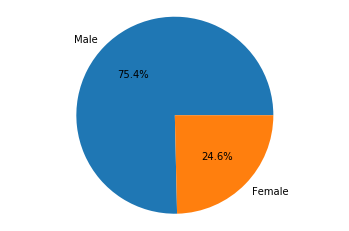

In [15]:
labels = 'Male', 'Female'
sizes = [753769, 246440]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [16]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69']
data['age_group'] = pd.cut(data.age, range(0, 71, 10), right=False, labels=labels)
most_rated_by_age = data.groupby('age_group').size()
most_rated_by_age

age_group
0-9       27211
10-19    183536
20-29    395556
30-39    199003
40-49     83633
50-59    111270
60-69         0
dtype: int64

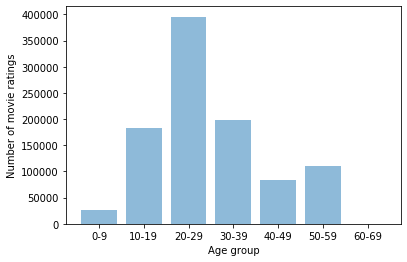

In [17]:
x = ('0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69')
y = np.arange(len(x))
performance = [27211, 183536, 395556, 199003, 83633, 111270, 0]

plt.bar(y, performance, align='center', alpha=0.5)
plt.xticks(y, x)
plt.xlabel('Age group')
plt.ylabel('Number of movie ratings')
plt.show()

From the results above, we observed that comedy and drama are the two most popular genres. Each has over 2.5 times more ratings than any other genre. We think the number of movie ratings received is a good indicator of movie popularity. In addition, males are more likely to leave movie ratings than females. From the data, over 75% of movie ratings are left by male users. Furthermore, the age group 20-29 contributes to the largest number of movie ratings, followed by age group 30-39 and 10-19. We observed that young people, especially people in their 20s are more likely to write movie ratings. The potential reason could be young people watch movies more frequently than people in other age groups, and young people use the internet more frequently and like to share their opinions on the Internet.